In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [77]:
import os
data_dir = os.path.join(os.getcwd(), 'animal_dataset') 

# Set image parameters
img_height = 32 
img_width = 32  
batch_size = 32

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode='int',
    color_mode='grayscale',     # important
    image_size=(img_height, img_width),
    shuffle=True,
    batch_size=None,            # VERY IMPORTANT: gives single samples, not batches
)
class_names = dataset.class_names
print("Classes:", class_names)

Found 300 files belonging to 3 classes.
Classes: ['cat', 'dog', 'panda']


In [78]:
# Converting all images and labels into NumPy arrays
x_data = []
y_data = []

for img, label in dataset:
    x_data.append(img.numpy())    # shape: (32,32,1)
    y_data.append(label.numpy())  # shape: scalar

x_data = np.array(x_data)
y_data = np.array(y_data)
print(y_data)
print("Full dataset shape:", x_data.shape, y_data.shape)

[2 1 1 2 0 2 0 2 0 2 1 2 0 2 2 2 0 1 2 1 2 1 0 1 1 0 1 2 2 1 0 1 1 0 1 1 2
 0 1 1 2 2 1 2 2 1 2 2 2 1 1 0 2 0 1 2 0 2 0 0 1 2 1 2 1 1 1 2 2 1 0 2 2 1
 0 1 0 1 1 1 0 0 2 0 2 1 2 0 1 2 1 2 2 2 2 0 0 2 2 0 0 0 1 0 2 2 1 0 1 1 1
 1 2 2 2 2 0 0 2 2 0 1 0 0 0 0 2 1 1 2 1 0 0 2 2 2 1 0 0 1 2 1 2 0 0 0 1 2
 2 2 1 1 2 1 1 0 0 2 0 0 2 1 0 0 1 0 0 2 0 2 0 0 0 0 1 2 1 2 2 1 2 1 0 1 2
 2 2 1 1 2 0 0 2 1 1 0 0 1 1 1 2 2 2 0 2 2 2 1 0 1 1 0 2 1 2 0 2 0 1 2 0 0
 0 2 0 1 0 1 0 0 1 0 2 1 1 0 1 1 1 1 1 1 2 0 0 2 0 0 0 2 0 0 0 1 0 0 1 1 2
 1 2 0 1 2 0 2 1 0 0 2 1 0 1 2 1 0 0 2 1 2 1 2 1 2 1 0 1 0 0 2 2 1 0 0 0 1
 0 2 0 1]
Full dataset shape: (300, 32, 32, 1) (300,)


In [79]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, shuffle=True, random_state=42
)
print(y_train)

[2 0 0 2 0 0 0 1 0 2 1 2 1 1 2 1 2 2 1 0 0 1 1 0 1 2 2 2 2 1 1 0 2 0 0 0 1
 2 1 2 0 1 1 1 2 1 2 2 1 0 0 1 2 0 2 0 1 0 1 2 2 0 2 2 1 1 1 0 0 2 0 2 0 0
 2 0 0 1 2 1 2 0 2 0 1 2 1 0 1 0 2 0 2 0 1 0 0 1 1 1 1 0 0 1 2 2 1 0 0 0 0
 0 0 2 2 0 1 1 0 1 2 2 0 1 0 1 0 0 2 2 2 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 0 0
 1 2 1 2 0 0 0 1 2 2 0 2 0 0 2 1 1 0 1 0 1 2 1 1 1 2 1 2 2 2 2 1 2 2 1 2 0
 0 0 0 0 2 2 0 2 1 0 0 1 0 2 1 2 2 1 2 1 0 0 2 0 0 1 1 1 2 0 1 2 0 2 0 0 1
 2 0 0 1 2 1 1 0 0 2 1 1 2 1 2 1 1 1]


In [80]:
cat_indices = np.where(y_train == class_names.index("cat"))[0]

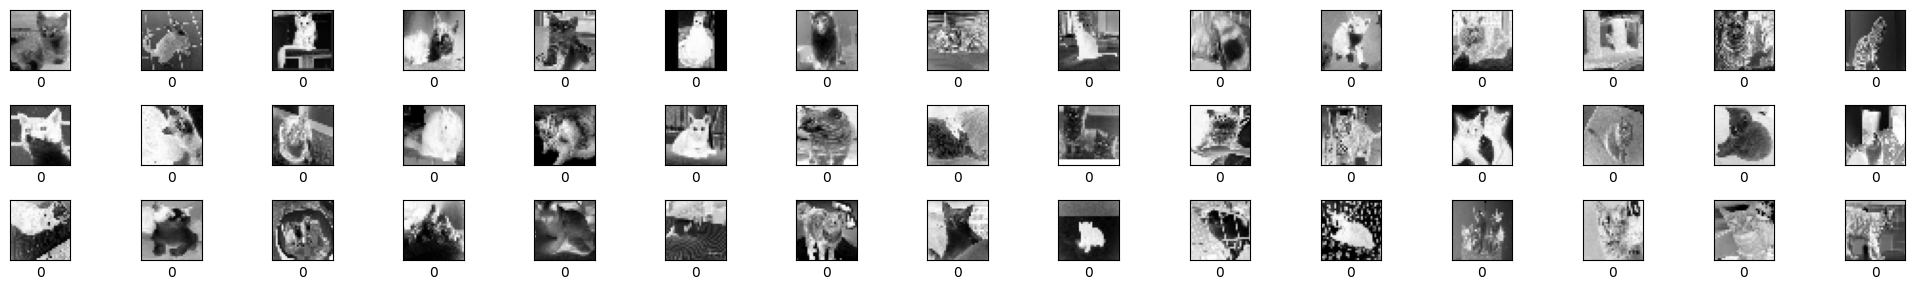

In [81]:
ROWS = 3
COLS = 15
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        inedx=cat_indices[i]
        plt.imshow(x_train[inedx], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[inedx])
        i += 1
plt.tight_layout()
plt.show() 

In [82]:

x_train = x_train.reshape(-1, 32*32).astype("float32") / 255.0
x_test = x_test.reshape(-1, 32*32).astype("float32") / 255.0

# K-FOLD Cross Validation

Metric       | K   | Mean Accuracy | Each Fold Accuracy (5 Folds)
---------------------------------------------------------------------------
manhattan    | 1   | 0.3958 | FOLDS: 0.3958, 0.4375, 0.4375, 0.3125, 0.3958
manhattan    | 3   | 0.4042 | FOLDS: 0.3542, 0.3958, 0.3750, 0.4167, 0.4792
manhattan    | 5   | 0.3875 | FOLDS: 0.3333, 0.3750, 0.3750, 0.3750, 0.4792
manhattan    | 7   | 0.4083 | FOLDS: 0.4167, 0.3333, 0.3542, 0.3958, 0.5417
manhattan    | 9   | 0.4250 | FOLDS: 0.4583, 0.3958, 0.3750, 0.4375, 0.4583
manhattan    | 11  | 0.4042 | FOLDS: 0.3542, 0.3958, 0.4375, 0.3542, 0.4792
manhattan    | 13  | 0.4583 | FOLDS: 0.4583, 0.5000, 0.5000, 0.4167, 0.4167
manhattan    | 15  | 0.4500 | FOLDS: 0.4375, 0.4583, 0.4583, 0.3958, 0.5000
manhattan    | 17  | 0.4125 | FOLDS: 0.3542, 0.3958, 0.4167, 0.4375, 0.4583
manhattan    | 19  | 0.4292 | FOLDS: 0.3750, 0.3542, 0.4583, 0.4375, 0.5208
euclidean    | 1   | 0.3583 | FOLDS: 0.2708, 0.4167, 0.3958, 0.3542, 0.3542
euclidean    | 3   | 0

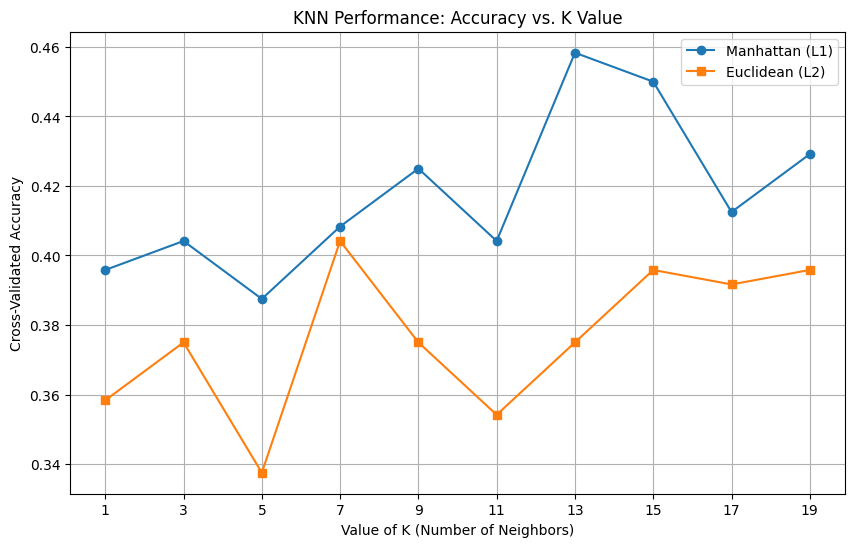

Best manhattan accuracy: 0.4583 at K=13
Best euclidean accuracy: 0.4042 at K=7


In [83]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

X = x_train if isinstance(x_train, np.ndarray) else x_train.values
y = y_train if isinstance(y_train, np.ndarray) else y_train.values

# 2. Define Hyperparameters to search
k_values = range(1, 21,2)  # Checking K from 1 to 20
distance_metrics = ['manhattan', 'euclidean']

# 3. Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store mean accuracies for final analysis
results = {
    'manhattan': [],
    'euclidean': []
}

print(f"{'Metric':<12} | {'K':<3} | {'Mean Accuracy'} | {'Each Fold Accuracy (5 Folds)'}")
print("-" * 75)

# 4. Nested Loops: Metric -> K -> Cross-Validation
for metric in distance_metrics:
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Cross-Validation Step
        cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
        mean_accuracy = np.mean(cv_scores)
        results[metric].append(mean_accuracy)   
        fold_scores_str = ', '.join([f'{score:.4f}' for score in cv_scores])
        
       
        print(f"{metric:<12} | {k:<3} | {mean_accuracy:.4f} | FOLDS: {fold_scores_str}")

# 5. Analysis & Visualization
# 
plt.figure(figsize=(10, 6))
plt.plot(k_values, results['manhattan'], label='Manhattan (L1)', marker='o')
plt.plot(k_values, results['euclidean'], label='Euclidean (L2)', marker='s')

plt.title('KNN Performance: Accuracy vs. K Value')
plt.xlabel('Value of K (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# 6. Find the Best Combination
for metric in distance_metrics:
    best_acc = max(results[metric])
    best_k = k_values[results[metric].index(best_acc)]
    print(f"Best {metric} accuracy: {best_acc:.4f} at K={best_k}")

In [84]:
best_metric = 'manhattan'
best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_model.fit(X, y)
def get_top5_predictions(model, X_single, y_full, class_names):
 
    distances, indices = model.kneighbors(X_single.reshape(1, -1), n_neighbors=5)  
    neighbor_labels = y_full[indices[0]]
    vote_counts = np.bincount(neighbor_labels, minlength=len(class_names))

    top5 = np.argsort(vote_counts)[::-1][:5]

    # Return class + votes
    return [(class_names[c], vote_counts[c]) for c in top5]


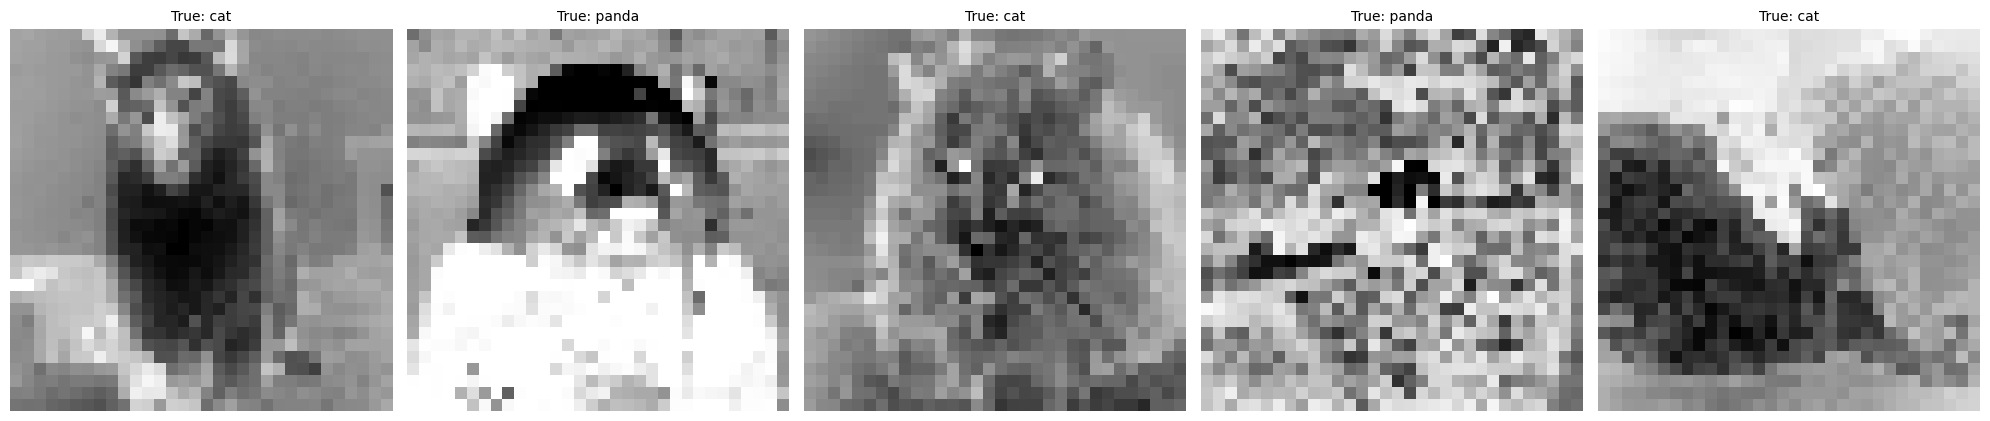

------------------------------------------------------------------------------------------------------------------------
Detailed Top-5 Predictions for Each Image:

--- Subplot 1 ---
Image #19
True: cat

Top 5:
cat: 3 votes
dog: 2 votes
panda: 0 votes


--- Subplot 2 ---
Image #17
True: panda

Top 5:
panda: 4 votes
cat: 1 votes
dog: 0 votes


--- Subplot 3 ---
Image #165
True: cat

Top 5:
cat: 3 votes
dog: 2 votes
panda: 0 votes


--- Subplot 4 ---
Image #69
True: panda

Top 5:
panda: 2 votes
dog: 2 votes
cat: 1 votes


--- Subplot 5 ---
Image #70
True: cat

Top 5:
cat: 4 votes
dog: 1 votes
panda: 0 votes

------------------------------------------------------------------------------------------------------------------------


In [85]:
N_IMAGES = 5
fig, axes = plt.subplots(1, N_IMAGES, figsize=(20, 5)) 

prediction_summaries = []

for i in range(N_IMAGES):
    # --- Data Retrieval ---
    idx = np.random.randint(0, len(X))       
    img = X[idx].reshape(32,32)            
    true_label = class_names[y[idx]]         

    # --- Get Predictions ---
    predictions = get_top5_predictions(best_model, X[idx], y, class_names)

    # --- Build Prediction Summary String ---
    pred_str = f"Image #{idx}\nTrue: {true_label}\n\nTop 5:\n"
    for cls, votes in predictions:
        pred_str += f"{cls}: {votes} votes\n"
    prediction_summaries.append(pred_str)

    # --- Plotting to Subplot ---
    ax = axes[i] # Select the current subplot axis
    ax.imshow(img,cmap=plt.cm.gray_r)
    ax.set_title(f"True: {true_label}", fontsize=10)
    ax.axis('off')

# Display the image figure
plt.tight_layout()
plt.show()

# --- Print Detailed Predictions below the figure ---
print("-" * 120)
print("Detailed Top-5 Predictions for Each Image:")
for i, summary in enumerate(prediction_summaries):
    print(f"\n--- Subplot {i+1} ---")
    print(summary)
print("-" * 120)


# Discussion: 
Manhattan (L1) vs. Euclidean (L2) DistanceThe Manhattan (L1) distance is the superior metric for this 32 X 32 grayscale image dataset, yielding a best average accuracy of 0.4458 at K=9 (vs. L2's 0.4125 at K=15).

L1 (Manhattan),"Better for high-dimensional, noisy pixel data. It sums absolute differences linearly, making it more robust to sparse outliers."
L2 (Euclidean),"Suboptimal because squaring differences heavily penalizes noise/outliers in individual pixels, distorting the true image similarity."

Limitations and Improvement:
The overall low accuracy 44.6% shows k-NN is insufficient for this task.
Limitation: $k$-NN fails due to the Curse of Dimensionality and its inability to learn complex features (like edges and shapes) from raw pixels.Improvement: For better accuracy, replace $k$-NN with a Convolutional Neural Network (CNN), which is designed to automatically learn hierarchical image features